In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from qolmat.benchmark import comparator, missing_patterns
from qolmat.imputations import imputers
from sklearn.linear_model import LinearRegression
from qolmat.utils import plot

In [2]:
df = pd.read_csv("../data/train.csv")

df.columns

Index(['id', 'valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10',
       'valeur_PM25'],
      dtype='object')

In [3]:
df.set_index("id", inplace=True)

df.index = pd.to_datetime(df.index)

In [ ]:
df

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
id,,,,,
2020-01-01 00:00:00,42.9,0.718,15.7,73.1,64.4
2020-01-01 01:00:00,33.6,0.587,10.1,74.8,66.0
2020-01-01 02:00:00,29.3,NaN,5.1,51.0,44.9
2020-01-01 03:00:00,30.5,0.246,7.2,27.7,25.1
2020-01-01 04:00:00,29.3,0.204,8.3,15.3,13.6
...,...,...,...,...,...
2024-09-03 18:00:00,NaN,0.222,55.1,12.0,5.3
2024-09-03 19:00:00,NaN,0.245,48.2,13.4,7.0
2024-09-03 20:00:00,NaN,0.234,44.5,12.4,7.1


In [5]:
columns = df.columns

# Imputation Strategies
# For valeur_O3: interpolate
# For other columns: MICE

In [8]:
imputer_interpol = imputers.ImputerInterpolation(method="linear")
imputer_mice = imputers.ImputerMICE(
    estimator=LinearRegression(),
    sample_posterior=False,
    max_iter=100,
)

In [9]:
df

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
id,,,,,
2020-01-01 00:00:00,42.9,0.718,15.7,73.1,64.4
2020-01-01 01:00:00,33.6,0.587,10.1,74.8,66.0
2020-01-01 02:00:00,29.3,NaN,5.1,51.0,44.9
2020-01-01 03:00:00,30.5,0.246,7.2,27.7,25.1
2020-01-01 04:00:00,29.3,0.204,8.3,15.3,13.6
...,...,...,...,...,...
2024-09-03 18:00:00,NaN,0.222,55.1,12.0,5.3
2024-09-03 19:00:00,NaN,0.245,48.2,13.4,7.0
2024-09-03 20:00:00,NaN,0.234,44.5,12.4,7.1


In [10]:
# Impute for each column
# 1. Interpolate for 'valeur_O3'
df["valeur_O3"] = imputer_interpol.fit_transform(df[["valeur_O3"]])

# 2. Apply MICE for other columns
df[["valeur_NO2", "valeur_CO", "valeur_PM10", "valeur_PM25"]] = (
    imputer_mice.fit_transform(
        df[["valeur_NO2", "valeur_CO", "valeur_PM10", "valeur_PM25"]]
    )
)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40991 entries, 2020-01-01 00:00:00 to 2024-09-03 22:00:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   valeur_NO2   40991 non-null  float64
 1   valeur_CO    40991 non-null  float64
 2   valeur_O3    40991 non-null  float64
 3   valeur_PM10  40991 non-null  float64
 4   valeur_PM25  40991 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB


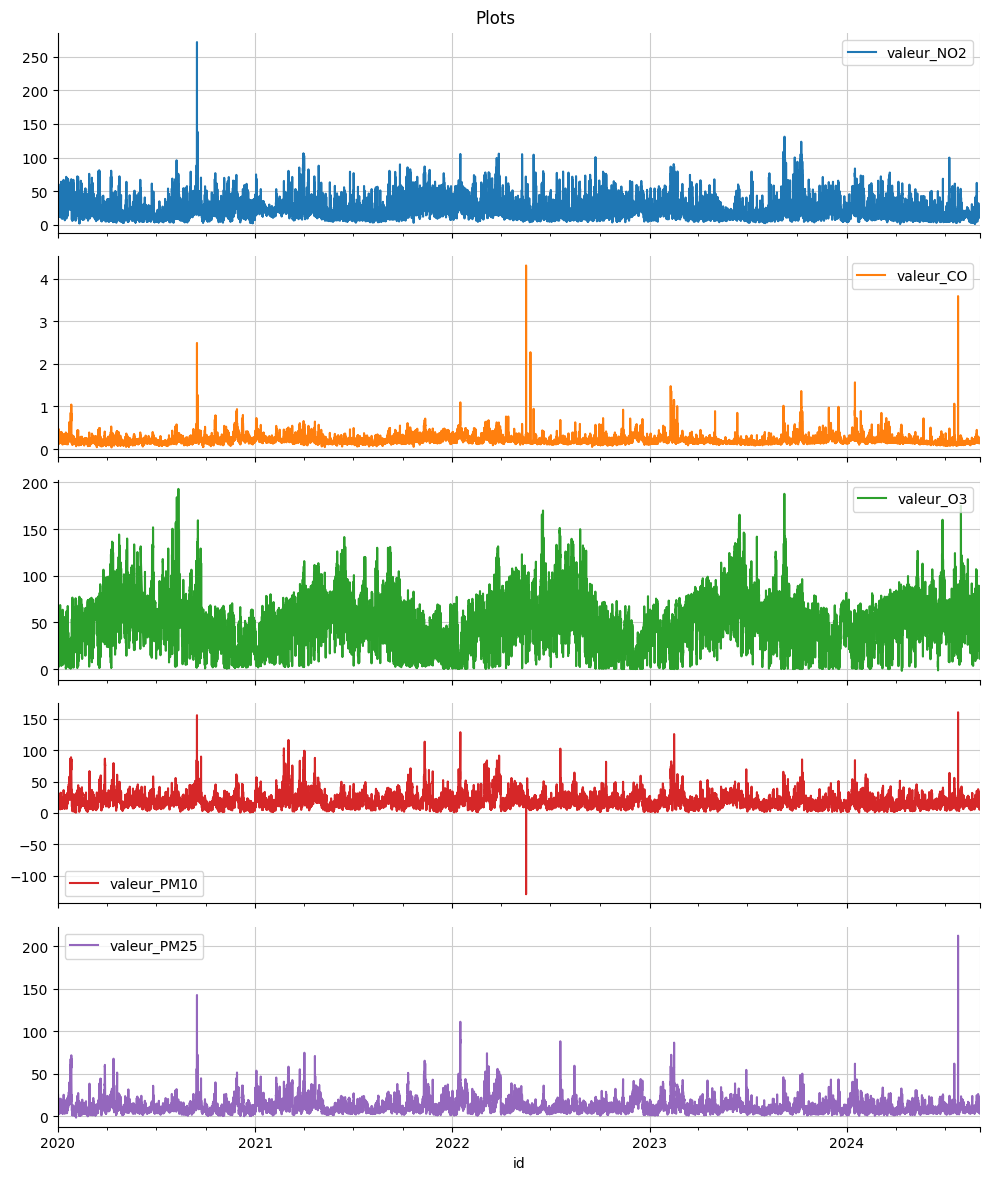

In [14]:
# Plotting the various columns in the dataframe
df.plot(subplots=True, figsize=(10, 12), title="Plots")
plt.tight_layout()
plt.show()


In [16]:
df.to_csv("../data/train_imputed.csv")